# Í∏∞Ï°¥ Î∞©ÏãùÎåÄÎ°ú ÏãúÌñâ

In [1]:
# ÌïÑÏöîÌïú Ìå®ÌÇ§ÏßÄ import ÌïòÍ∏∞
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

# 1.  ÏÇ¨ÏßÑ Í∞ÄÏ†∏Ïò§Í∏∞

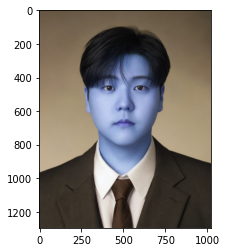

In [3]:
my_image_path = 'images/ÌîÑÎ°úÌïÑÏÇ¨ÏßÑ-A.jpg' # Î≥∏Ïù∏ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏûàÎäî Í≤ΩÎ°úÎ•º Í∞ÄÏßÄÍ≥† Ïò®Îã§.
img_bgr = cv2.imread(my_image_path)    # OpenCVÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§
img_show = img_bgr.copy()      # Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄÎ•º Îî∞Î°ú Î≥¥Í¥ÄÌï©ÎãàÎã§
plt.imshow(img_bgr) # Ïù¥ÎØ∏ÏßÄÎ•º Ï∂úÎ†•ÌïòÍ∏∞ ÏúÑÌï¥ Ï∂úÎ†•Ìï† Ïù¥ÎØ∏ÏßÄÎ•º Ïò¨Î†§Ï§ÄÎã§. (Ïã§Ï†ú Ï∂úÎ†•ÏùÄ ÌïòÏßÄ ÏïäÏùå)
plt.show() # Ïù¥ÎØ∏ÏßÄÎ•º Ï∂úÎ†•Ìï¥Ï§ÄÎã§. (Ïã§Ï†ú Ï∂úÎ†•)

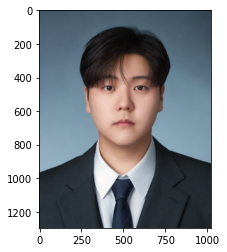

In [4]:
# plt.imshow Ïù¥Ï†ÑÏóê RGB Ïù¥ÎØ∏ÏßÄÎ°ú Î∞îÍæ∏Îäî Í≤ÉÏùÑ ÏûäÏßÄÎßàÏÑ∏Ïöî. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # Ïù¥ÎØ∏ÏßÄ Ïã§Ï†ú Ï∂úÎ†•ÌïòÍ∏∞ ÏúÑÌï¥ Ïù¥ÎØ∏ÏßÄÎ•º Ïò¨Î†§Ï§å (ÏõêÌïòÎäî ÏÇ¨Ïù¥Ï¶àÏùò ÌîΩÏÖÄÏùÑ ÏõêÌïòÎäî ÏÉâÏúºÎ°ú Ï±ÑÏõåÏÑú ÎßåÎì† Í∑∏Î¶ºÏù¥ÎùºÍ≥† Ìï©ÎãàÎã§.)
plt.show() # Ïù¥ÎØ∏ÏßÄ Ïã§Ï†ú Ï∂úÎ†•

# 2. Bounding Box ÏÉùÏÑ±

In [5]:
# detectorÎ•º ÏÑ†Ïñ∏Ìï©ÎãàÎã§
detector_hog = dlib.get_frontal_face_detector() # Í∏∞Î≥∏ ÏñºÍµ¥ Í∞êÏßÄÍ∏∞Î•º Î∞òÌôò

In [6]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

rectangles[[(297, 348) (759, 811)]]


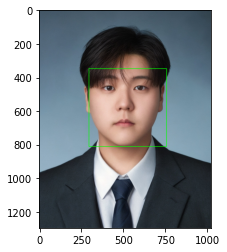

In [7]:
# ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ ÏÉùÏÑ±
print(dlib_rects)   

for dlib_rect in dlib_rects: # Ï∞æÏùÄ ÏñºÍµ¥ ÏòÅÏó≠Ïùò Ï¢åÌëú
    l = dlib_rect.left() # ÏôºÏ™Ω
    t = dlib_rect.top() # ÏúÑÏ™Ω
    r = dlib_rect.right() # Ïò§Î•∏Ï™Ω
    b = dlib_rect.bottom() # ÏïÑÎûòÏ™Ω

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # ÏãúÏûëÏ†êÏùò Ï¢åÌëúÏôÄ Ï¢ÖÎ£åÏ†ê Ï¢åÌëúÎ°ú ÏßÅÍ∞Å ÏÇ¨Í∞ÅÌòïÏùÑ Í∑∏Î¶º

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 3. ÏÇ¨Ï†Ñ ÌïôÏäµ Î™®Îç∏ ÌôúÏö© ÎûúÎìúÎßàÌÅ¨ ÏÉùÏÑ±

In [8]:
model_path = 'models/shape_predictor_68_face_landmarks.dat'
    # Ï†ÄÏû•Ìïú landmark Î™®Îç∏Ïùò Ï£ºÏÜåÎ•º model_path Î≥ÄÏàòÏóê Ï†ÄÏû•
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib ÎùºÏù¥Î∏åÎü¨Î¶¨Ïùò shape_predictor Ìï®ÏàòÎ•º Ïù¥Ïö©ÌïòÏó¨ Î™®Îç∏ÏùÑ Î∂àÎü¨Ïò¥
    # landmark_predictorÎäî RGBÏù¥ÎØ∏ÏßÄÏôÄ dlib.rectangleÎ•º ÏûÖÎ†• Î∞õÍ≥† dlib.full_object_detectionÎ•º Î∞òÌôò
    # dlib.rectangle: ÎÇ¥Î∂ÄÎ•º ÏòàÏ∏°ÌïòÎäî Î∞ïÏä§
    # dlib.full_object_detection: Í∞Å Íµ¨ÏÑ± ÏöîÏÜåÏùò ÏúÑÏπòÏôÄ, Ïù¥ÎØ∏ÏßÄ ÏÉÅÏùò Í∞ùÏ≤¥Ïùò ÏúÑÏπòÎ•º ÎÇòÌÉÄÎÉÑ

üå´üõ∏


In [9]:
list_landmarks = []
    # ÎûúÎìúÎßàÌÅ¨Ïùò ÏúÑÏπòÎ•º Ï†ÄÏû•Ìï† list ÏÉùÏÑ±    

# ÏñºÍµ¥ ÏòÅÏó≠ Î∞ïÏä§ ÎßàÎã§ face landmarkÎ•º Ï∞æÏïÑÎÉÖÎãàÎã§
# face landmark Ï¢åÌëúÎ•º Ï†ÄÏû•Ìï¥Îë°ÎãàÎã§
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # Î™®Îì† landmarkÏùò ÏúÑÏπòÏ†ïÎ≥¥Î•º points Î≥ÄÏàòÏóê Ï†ÄÏû•
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # Í∞ÅÍ∞ÅÏùò landmark ÏúÑÏπòÏ†ïÎ≥¥Î•º (x,y) ÌòïÌÉúÎ°ú Î≥ÄÌôòÌïòÏó¨ list_points Î¶¨Ïä§Ìä∏Î°ú Ï†ÄÏû•
    list_landmarks.append(list_points)
        # list_landmarksÏóê ÎûúÎìúÎßàÌÅ¨ Î¶¨Ïä§Ìä∏Î•º Ï†ÄÏû•

print(len(list_landmarks[0]))
    # ÏñºÍµ¥Ïù¥ nÍ∞úÏù∏ Í≤ΩÏö∞ list_landmarksÎäî nÍ∞úÏùò ÏõêÏÜåÎ•º Í∞ñÍ≥†
    # Í∞Å ÏõêÏÜåÎäî 68Í∞úÏùò ÎûúÎìúÎßàÌÅ¨ ÏúÑÏπòÍ∞Ä ÎÇòÏó¥Îêú list 
    # list_landmarksÏùò ÏõêÏÜåÍ∞Ä 1Í∞úÏù¥ÎØÄÎ°ú list_landmarks[1]ÏùÑ Ìò∏Ï∂úÌïòÎ©¥ IndexErrorÍ∞Ä Î∞úÏÉù

68


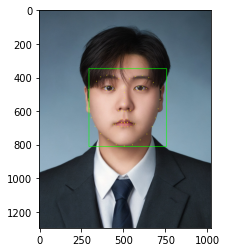

In [10]:
# list_landmarksÏùò ÏõêÏÜåÍ∞Ä 1Í∞úÏù¥ÎØÄÎ°ú ÏïÑÎûò Î∞òÎ≥µÎ¨∏ÏùÄ ÌïúÎ≤àÎßå Ïã§ÌñâÎê®
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCVÏùò ÏõêÏùÑ Í∑∏Î¶¨Îäî Ìï®Ïàò
            # img_show Ïù¥ÎØ∏ÏßÄ ÏúÑ Í∞ÅÍ∞ÅÏùò pointÏóê
            # ÌÅ¨Í∏∞Í∞Ä 2Ïù¥Í≥† (0, 255, 255)ÏÉâÏúºÎ°ú ÎÇ¥Î∂ÄÍ∞Ä Ï±ÑÏõåÏßÑ(-1) ÏõêÏùÑ Í∑∏Î¶º
            # (ÎßàÏßÄÎßâ Ïù∏ÏàòÍ∞Ä ÏûêÏó∞ÏàòÎùºÎ©¥ Í∑∏ÎßåÌÅºÏùò ÎëêÍªòÏùò ÏÑ†ÏúºÎ°ú ÏõêÏù¥ Í∑∏Î†§Ïßê)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB Ïù¥ÎØ∏ÏßÄÎ°ú Ï†ÑÌôò
plt.imshow(img_show_rgb)
    # Ïù¥ÎØ∏ÏßÄÎ•º Ï§ÄÎπÑ
plt.show()
    # Ïù¥ÎØ∏ÏßÄÎ•º Ï∂úÎ†•

In [11]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # ÏñºÍµ¥ ÏòÅÏó≠ÏùÑ Ï†ÄÏû•ÌïòÍ≥† ÏûàÎäî Í∞íÍ≥º 68Í∞úÏùò ÎûúÎìúÎßàÌÅ¨Î•º Ï†ÄÏû•ÌïòÍ≥† ÏûàÎäî Í∞íÏúºÎ°ú Î∞òÎ≥µÎ¨∏ Ïã§Ìñâ
    print (landmark[30]) # ÏΩîÏùò indexÎäî 30 ÏûÖÎãàÎã§
    x = landmark[30][0] # Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏΩî Î∂ÄÏúÑÏùò xÍ∞í
    y = landmark[30][1] - dlib_rect.height()//2 # Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏΩî Î∂ÄÏúÑÏùò yÍ∞í - ÏñºÍµ¥ ÏòÅÏó≠Ïùò ÏÑ∏Î°úÎ•º Ï∞®ÏßÄÌïòÎäî ÌîΩÏÖÄÏùò Ïàò//2 ‚Üí (437, 182-(186+1//2))
    w = h = dlib_rect.width() # ÏñºÍµ¥ ÏòÅÏó≠Ïùò Í∞ÄÎ°úÎ•º Ï∞®ÏßÄÌïòÎäî ÌîΩÏÖÄÏùò Ïàò (531-345+1) ‚Üí max(x) - min(x) +1(ÌîΩÏÖÄÏùò Ïàò Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê 1ÏùÑ ÎçîÌï¥Ï§å ‚Üí ÌîΩÏÖÄ ÏàòÎäî Ï†ê ÌïòÎÇòÎ°úÎèÑ 1Ïù¥ Îê®)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(509, 557)
(x,y) : (509,325)
(w,h) : (463,463)


In [12]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/king.png' # ÏôïÍ¥Ä Ïù¥ÎØ∏ÏßÄÏùò Í≤ΩÎ°ú
img_sticker = cv2.imread(sticker_path) # Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§ // cv2.imread(Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú) ‚Üí imageÍ∞ùÏ≤¥ ÌñâÎ†¨ÏùÑ Î∞òÌôò
img_sticker = cv2.resize(img_sticker, (w,h)) # Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ Ï°∞Ï†ï ‚Üí w,hÎäî ÏñºÍµ¥ ÏòÅÏó≠Ïùò Í∞ÄÎ°úÎ•º Ï∞®ÏßÄÌïòÎäî ÌîΩÏÖÄÏùò Ïàò(187) // cv2.resize(imageÍ∞ùÏ≤¥ ÌñâÎ†¨, (Í∞ÄÎ°ú Í∏∏Ïù¥, ÏÑ∏Î°ú Í∏∏Ïù¥))
print (img_sticker.shape) # ÏÇ¨Ïù¥Ï¶àÎ•º Ï°∞Ï†ïÌïú ÏôïÍ¥Ä Ïù¥ÎØ∏ÏßÄÏùò Ï∞®Ïõê ÌôïÏù∏

(463, 463, 3)


# 4. ÎûúÎìúÎßàÌÅ¨ ÌôúÏö© Ïä§Ìã∞Ïª§ Î∂ôÏù¥Í∏∞

In [13]:
# x,y,w,h Î™®Îëê ÏúÑÏóêÏÑú Î∞òÎ≥µÎ¨∏ ÏïàÏóêÏÑú ÏßÄÏ†ïÌï¥Ï§Ä Í∞íÏûÑ
# xÎäî Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏΩî Î∂ÄÏúÑÏùò xÍ∞í = 437
# yÎäî Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏΩî Î∂ÄÏúÑÏùò yÍ∞í = 89
# wÎäî ÏñºÍµ¥ ÏòÅÏó≠Ïùò Í∞ÄÎ°úÎ•º Ï∞®ÏßÄÌïòÎäî ÌîΩÏÖÄÏùò Ïàò = 187
# hÎäî ÏñºÍµ¥ ÏòÅÏó≠Ïùò Í∞ÄÎ°úÎ•º Ï∞®ÏßÄÌïòÎäî ÌîΩÏÖÄÏùò Ïàò = 187
refined_x = x - w // 2 # 437 - (187//2) = 437-93 = 344
refined_y = y - h # 89-187 = -98
# ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏóê Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º Ï∂îÍ∞ÄÌïòÍ∏∞ ÏúÑÌï¥ÏÑú x, y Ï¢åÌëúÎ•º Ï°∞Ï†ïÌï©ÎãàÎã§. Ïù¥ÎØ∏ÏßÄ ÏãúÏûëÏ†êÏùÄ top-left Ï¢åÌëúÏù¥Í∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§.
# Ï¶â, refined_x, refined_yÍ∞íÏóêÏÑú ÏôïÍ¥Ä Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏãúÏûëÎê®
print (f'(x,y) : ({refined_x},{refined_y})') # ÏùåÏàò Î∞úÏÉù : Ïù¥ÎØ∏ÏßÄ Î≤îÏúÑÎ•º Î≤óÏñ¥ÎÇ®
# Ïö∞Î¶¨Îäî ÌòÑÏû¨ Ïù¥Îßà ÏûêÎ¶¨Ïóê ÏôïÍ¥ÄÏùÑ ÎëêÍ≥† Ïã∂ÏùÄÍ±¥Îç∞, Ïù¥ÎßàÏúÑÏπò - ÏôïÍ¥Ä ÎÜíÏù¥Î•º ÌñàÎçîÎãà Ïù¥ÎØ∏ÏßÄÏùò Î≤îÏúÑÎ•º Ï¥àÍ≥ºÌïòÏó¨ ÏùåÏàòÍ∞Ä ÎÇòÏò§Îäî Í≤É
# opencvÎäî ndarrayÎç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÎäîÎç∞, ndarrayÎäî ÏùåÏàòÏù∏Îç±Ïä§Ïóê Ï†ëÍ∑º Î∂àÍ∞ÄÌïòÎØÄÎ°ú Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º ÏûòÎùº Ï§òÏïº ÌïúÎã§.

(x,y) : (278,-138)


In [14]:
# ÏôïÍ¥Ä Ïù¥ÎØ∏ÏßÄÍ∞Ä Ïù¥ÎØ∏ÏßÄ Î∞ñÏóêÏÑú ÏãúÏûëÌïòÏßÄ ÏïäÎèÑÎ°ù Ï°∞Ï†ïÏù¥ ÌïÑÏöîÌï®
# Ï¢åÌëú ÏàúÏÑúÍ∞Ä y,xÏûÑÏóê Ïú†ÏùòÌïúÎã§. (y,x,rgb channel)
# ÌòÑÏû¨ ÏÉÅÌô©ÏóêÏÑúÎäî -y ÌÅ¨Í∏∞ÎßåÌÅº Ïä§Ìã∞Ïª§Î•º crop ÌïòÍ≥†, top Ïùò xÏ¢åÌëúÏôÄ y Ï¢åÌëúÎ•º Í∞ÅÍ∞ÅÏùò Í≤ΩÏö∞Ïóê ÎßûÏ∂∞ ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏùò Í≤ΩÍ≥Ñ Í∞íÏúºÎ°ú ÏàòÏ†ïÌïòÎ©¥ ÏïÑÎûòÏôÄ Í∞ôÏùÄ ÌòïÏãùÏúºÎ°ú ÎÇòÏòµÎãàÎã§.
# ÏùåÏàòÍ∞í ÎßåÌÅº ÏôïÍ¥Ä Ïù¥ÎØ∏ÏßÄ(ÌòπÏùÄ Ï∂îÌõÑ Ï†ÅÏö©Ìï† Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ)Î•º ÏûêÎ•∏Îã§.
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
# ÏôïÍ¥Ä Ïù¥ÎØ∏ÏßÄÎ•º ÏîåÏö∞Í∏∞ ÏúÑÌï¥ ÏôïÍ¥Ä Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏãúÏûëÌï† yÏ¢åÌëú Í∞í Ï°∞Ï†ï
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] # refined_yÍ∞Ä -98Ïù¥ÎØÄÎ°ú, img_sticker[98: , :]Í∞Ä ÎêúÎã§. (187, 187, 3)ÏóêÏÑú (89, 187, 3)Ïù¥ Îê® (187Í∞ú Ï§ëÏóêÏÑú 98Í∞úÍ∞Ä ÏûòÎ†§ÎÇòÍ∞ê)
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (278,0)


In [15]:
# sticker_areaÎäî ÏõêÎ≥∏Ïù¥ÎØ∏ÏßÄÏóêÏÑú Ïä§Ìã∞Ïª§Î•º Ï†ÅÏö©Ìï† ÏúÑÏπòÎ•º cropÌïú Ïù¥ÎØ∏ÏßÄ ÏûÖÎãàÎã§.
# ÏòàÏ†úÏóêÏÑúÎäî (344,0) Î∂ÄÌÑ∞ (344+187, 0+89) Î≤îÏúÑÏùò Ïù¥ÎØ∏ÏßÄÎ•º ÏùòÎØ∏Ìï©ÎãàÎã§.
# Ï¢åÌëú ÏàúÏÑúÍ∞Ä y,xÏûÑÏóê Ïú†ÏùòÌïúÎã§. (y,x,rgb channel)
# img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_show[0:0+89, 344:344+187]
# img_show[0:89, 344:531]
# Ï¶â, xÏ¢åÌëúÎäî 344~531 / yÏ¢åÌëúÎäî 0~89Í∞Ä Îê®
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# ÏôïÍ¥Ä Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏÇ¨Ïö©Ìï† Î∂ÄÎ∂ÑÏùÄ 0Ïù¥ ÏïÑÎãå ÏÉâÏù¥ ÏûàÎäî Î∂ÄÎ∂ÑÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.
# ÏôïÍ¥Ä Ïù¥ÎØ∏ÏßÄÏóêÏÑú 0Ïù¥ ÎÇòÏò§Îäî Î∂ÄÎ∂ÑÏùÄ Ìù∞ÏÉâÏù¥ÎùºÎäî Îúª, Ï¶â Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏóÜÎã§Îäî ÏÜåÎ¶¨ÏûÑ.
# ÌòÑÏû¨ ÏôïÍ¥Ä Ïù¥ÎØ∏ÏßÄÏóêÏÑúÎäî ÏôïÍ¥ÄÍ≥º Î∞õÏπ®ÎåÄ Î∞ëÏùò ------ Î∂ÄÎ∂ÑÏù¥ Îê®
# Í∑∏Î†áÍ∏∞ ÎïåÎ¨∏Ïóê 0Ïù∏ Î∂ÄÎ∂Ñ(Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏóÜÎäî Î∂ÄÎ∂Ñ)ÏùÄ Ï†úÏô∏ÌïòÍ≥† Ï†ÅÏö©
# sticker_areaÎäî ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏóêÏÑú Ïä§Ìã∞Ïª§Î•º Ï†ÅÏö©Ìï† ÏúÑÏπòÎ•º ÎØ∏Î¶¨ ÏûòÎùºÎÇ∏ Ïù¥ÎØ∏ÏßÄÏûÖÎãàÎã§.
# Ï¶â, ÏôïÍ¥Ä Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏôïÍ¥Ä Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏóÜÎäî Î∂ÄÎ∂Ñ(ÏôïÍ¥ÄÍ≥º Î∞õÏπ®ÎåÄ Î∞ëÏùò ------ Î∂ÄÎ∂Ñ)ÏùÄ ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÎØ∏Î¶¨ ÏûòÎùºÎÜìÏùÄ sticker_area(Ïä§Ìã∞Ïª§ Ï†ÅÏö©Ìï† Î∂ÄÎ∂Ñ ÎßåÌÅº ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏûêÎ•∏ Ïù¥ÎØ∏ÏßÄ)Î•º Ï†ÅÏö©ÌïòÍ≥†,
# ÎÇòÎ®∏ÏßÄ Î∂ÄÎ∂ÑÏùÄ Ïä§Ìã∞Ïª§Î°ú Ï±ÑÏõåÏ£ºÎ©¥ Îê®
# np.whereÎäî Ï°∞Í±¥Ïóê Ìï¥ÎãπÌïòÎäî Ïù∏Îç±Ïä§Îßå Ï∞æÏïÑÏÑú Í∞íÏùÑ Ï†ÅÏö©ÌïòÎäî Î∞©Î≤ïÏù¥Îã§.
# ÏïÑÎûò ÏΩîÎìúÏóêÏÑúÎäî img_stickerÍ∞Ä 0Ïùº Í≤ΩÏö∞(ÏôïÍ¥Ä Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏôïÍ¥Ä Î∂ÄÎ∂Ñ Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ Ïù¥ÎØ∏ÏßÄ)ÏóêÎäî sticker_area(ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏóêÏÑú Ïä§Ìã∞Ïª§Î•º Ï†ÅÏö©Ìï† ÏúÑÏπòÎ•º ÎØ∏Î¶¨ ÏûòÎùºÎÇ∏ Ïù¥ÎØ∏ÏßÄ)Î•º Ï†ÅÏö©ÌïòÍ≥†,
# ÎÇòÎ®∏ÏßÄ Î∂ÄÎ∂ÑÏùÄ img_sticker(ÏôïÍ¥Ä Ïù¥ÎØ∏ÏßÄ)Î•º Ï†ÅÏö©ÌïúÎã§.
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

Ïäù~


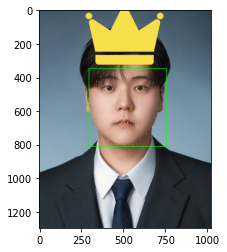

In [16]:
# ÏôïÍ¥Ä Ïù¥ÎØ∏ÏßÄÎ•º Ï†ÅÏö©Ìïú Ïù¥ÎØ∏ÏßÄÎ•º Î≥¥Ïó¨Ï§ÄÎã§.
# ÏñºÍµ¥ ÏòÅÏó≠(7-3)Í≥º ÎûúÎìúÎßàÌÅ¨(7-4)Î•º ÎØ∏Î¶¨ Ï†ÅÏö©Ìï¥ÎÜìÏùÄ img_showÏóê ÏôïÍ¥Ä Ïù¥ÎØ∏ÏßÄÎ•º ÎçßÎ∂ôÏù∏ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÎÇòÏò§Í≤å ÎêúÎã§.)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

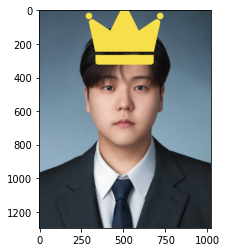

In [17]:
# ÏúÑÏóêÏÑú ÏÑ§Î™ÖÌñàÏúºÎØÄÎ°ú ÏÉùÎûµ
# ÏôïÍ¥Ä Ïù¥ÎØ∏ÏßÄ
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgrÏùÄ 7-2ÏóêÏÑú rgbÎ°úÎßå Ï†ÅÏö©Ìï¥ÎÜìÏùÄ ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏù¥Îã§. 
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgbÎßå Ï†ÅÏö©Ìï¥ÎÜìÏùÄ ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏóê ÏôïÍ¥Ä Ïù¥ÎØ∏ÏßÄÎ•º ÎçÆÏñ¥ ÏîåÏö¥ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÎÇòÏò§Í≤å ÎêúÎã§.
plt.show()